# Gráficas y manejo de funciones

## Gráfica

Para los literales que solicitan una gráfica, utilizaremos estas librerias:

In [247]:
import numpy as np
import matplotlib.pyplot as plt
import math

"Numpy" es una librería que se especializa en el cálculo y manejo de datos numéricos mientras que la librería "Matplotlib" se encarga de graficar en dos dimensiones. La última mencionada es similar a la que es utilizada en Matlab.

## Algoritmos para aplicar la bisección

En este caso, el código que resolverá las cuestiones en los ejercicios es el dispuesto en el aula virtual, solamente que explicado en este documento.

### Signos

Este fragmento de código se interpreta como una función sencilla que devuelve, en pocas palabras, el signo del número flotante que reciba como parámetro. Nos será de gran utilidad en cuanto a la búsqueda de la raíz en el problema.


In [249]:
def sign(x: float) -> int:
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0


### Función bisección

Manejamos la clase Callable que nos servirá para llamar a distintas funciones (ecuaciones) y entregárselas a la funcion bisección como parámetro. Entonces los parámetros a recibir para "bisection" son:

1. Límite inferior del dominio a analizar (a).
2. Límite superior del dominio a analizar (b).
3. Función a analizar (equation), "Callable" nos informa que debe ser una función con un parámetro de entrada float y uno de salida del mismo tipo.
4. Tolerancia de error (tol).
5. Límite de iteraciones (N).

La función devolverá el número de iteraciones (i) que le tomó al algoritmo para encontrar la raíz y la raíz en sí. Primero comprobará si el intervalo dado es válido por lo que se usa la función "sign", evitando así, desbordes de memoria. Después calculará la mitad de el intervalo, y decidirá cuál de los dos es el que contiene a la raíz para proseguir con las siguientes iteraciones.

In [251]:
from typing import Callable

def bisection(
    a: float, b: float, *, equation: Callable[[float], float], tol: float, N: int
) -> tuple[float, int] | None:
    i = 1
    
    assert a < b, "a not lower than b, the interval is not valid."

    assert (
        equation(a) * equation(b) < 0
    ), "The function does not change sign over the interval."

    Fa = equation(a)
    p = a 
    for i in range(N):
        p = a + (b - a) / 2
        FP = equation(p)
        
        if FP == 0 or (b - a) / 2 < tol:
            return p, i

        if sign(Fa) * sign(FP) > 0:
            a = p
            Fa = FP
            
        else:
            b = p

    return p, i

Los criterios de parada (tol, N) nos ayudan a terminar el programa si es que la ejecución se encuentra con un loop infinito ya sea por no encontrar la raíz o excepciones.

# Conjunto de ejercicios

## Ejercicio 1

Use el método de bisección para encontrar soluciones precisas dentro de $10^{-2}$ para $x^{3} - 7x^{2} + 14x - 6 = 0$ en cada intervalo. 

El primer ejercicio ya nos da el error relativo máximo que puede tener, así que utilizamos la funcion "bisection".

### Literal a)

Raíz 1 = El rango propuesto es : (0; 1.5). Para la ejecución se declara:


In [253]:
r1, i = bisection(a = 0, b = 1, 
                  equation = lambda x : x**3 - 7*x**2 + 14*x - 6, tol = 10**(-2), N = 20)
print(f'La biseccion dio como resultado la raíz {r1} en {i} iteraciones')

La biseccion dio como resultado la raíz 0.5859375 en 6 iteraciones



### Literal b)

Raíz 2 = El rango propuesto es : (1; 3.2). Para la ejecución se declara:


In [255]:
r2, i = bisection(a = 1, b = 3.2, 
                  equation = lambda x : x**3 - 7*x**2 + 14*x - 6, tol = 10**(-2), N = 20)
print(f'La biseccion dio como resultado la raíz {r2} en {i} iteraciones')

La biseccion dio como resultado la raíz 3.0023437500000005 en 7 iteraciones



### Literal c)

Raíz 3 = El rango propuesto es : (3.2; 4). Para la ejecución se declara:


In [257]:
r3, i = bisection(a = 3.2, b = 4, 
                  equation = lambda x : x**3 - 7*x**2 + 14*x - 6, tol = 10**(-2), N = 20)
print(f'La biseccion dio como resultado la raíz {r3} en {i} iteraciones')

La biseccion dio como resultado la raíz 3.41875 en 6 iteraciones



## Ejercicio 2

### Literal a)

Dibuje las gráficas para $y = x$ y $y = \sin{x}$. 

Para este literal y los siguientes se introduce el uso de las librerías mencionadas para la gráfica de funciones con el siguiente código:


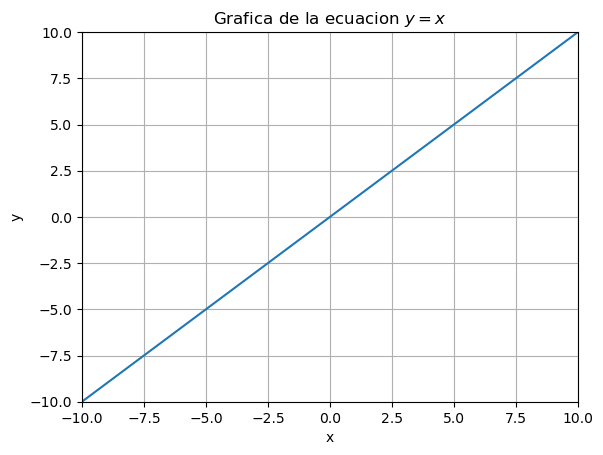

In [259]:
X = np.linspace(-10, 10, 100)

plt.plot(X, X) # x = y

plt.xlabel('x')
plt.ylabel('y')
plt.title('Grafica de la ecuacion $y = x$')
ax = plt.gca()
ax.set_ylim([-10, 10])
ax.set_xlim([-10, 10])
plt.grid(True)
plt.show()


Como introducción, para graficar la función, se crea una lista de 100 valores de x de -10 a 10, para después calcular cada una de sus imágenes. Lo restante es propio del módulo. La función graficada tiene los mismos valores en x y y, por lo que se igualaron las dos listas.

La siguiente gráfica es para la función $y = \sin{x}$.


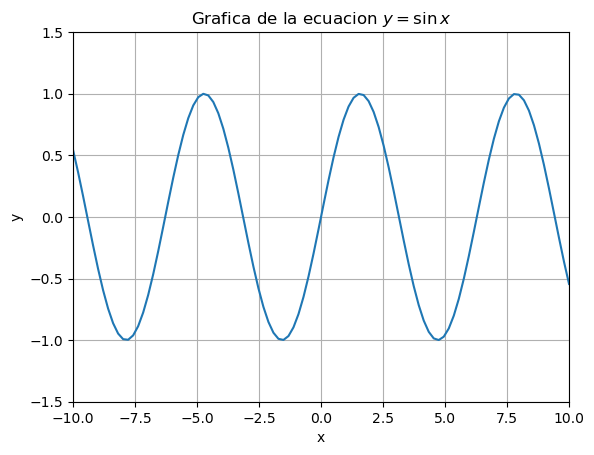

In [261]:
Y = [(lambda x : math.sin(x))(x) for x in X]

plt.plot(X, Y)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Grafica de la ecuacion $y = \sin{x}$')
ax = plt.gca()
ax.set_ylim([-1.5, 1.5])
ax.set_xlim([-10, 10])
plt.grid(True)
plt.show()


### Literal b)

Use el método de bisección para encontrar soluciones precisas dentro de $10^{-5}$ para el primer valor positivo 
de $x$ con $y = 2 \sin{x}$. 

Fácilmente se ejecuta el anterior algoritmo.

In [263]:
r, i = bisection(a = 0.2, b = 3.5, 
                 equation = lambda x : 2*math.sin(x), tol = 10**(-5), N = 20)
print(f'La biseccion dio como resultado la raíz {r} en {i} iteraciones')

La biseccion dio como resultado la raíz 3.141586494445801 en 18 iteraciones



## Ejercicio 3

### Literal a)

Dibuje las gráficas para $y = \tan{x}$. 

El siguiente código ilustra la función solicitada:


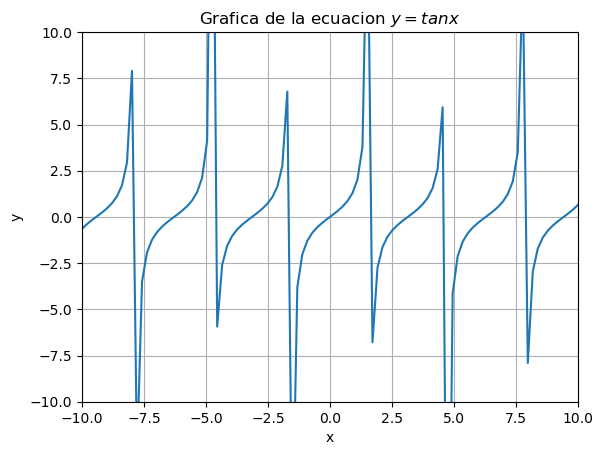

In [265]:
Y = np.tan(X)

plt.plot(X, Y)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Grafica de la ecuacion $y = tan{x}$')
ax = plt.gca()
ax.set_ylim([-10, 10])
ax.set_xlim([-10, 10])
plt.grid(True)
plt.show()


### Literal b)

Use el método de bisección para encontrar una aproximación dentro de 10 para el primer valor positivo 
de $x$ con $y = tan(x)$.

Fácilmente se ejecuta el anterior algoritmo.

In [267]:
r, i = bisection(a = -1.2, b = 1, 
                 equation = lambda x : math.tan(x), tol = 10**(-5), N = 20)
print(f'La biseccion dio como resultado la raíz {r} en {i} iteraciones')

La biseccion dio como resultado la raíz -5.340576171753884e-06 en 17 iteraciones



## Ejercicio 4

### Literal a)

Dibuje las gráficas para $y = x^2 - 1$ y $y = e^{1 - x^2}$

Primero, la gráfica para la función $y = x^2 - 1$:


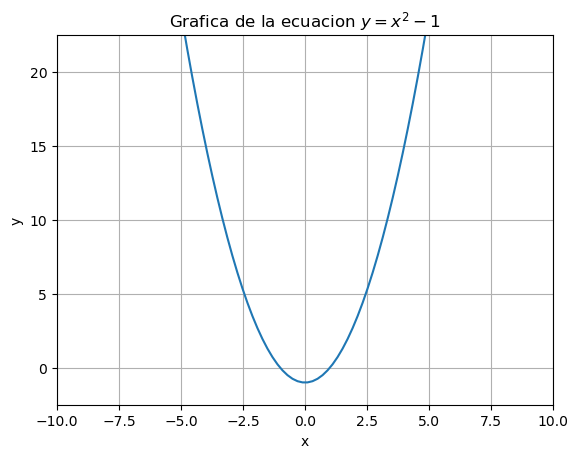

In [269]:
Y = [(lambda x : x**2 - 1)(x) for x in X]

plt.plot(X, Y)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Grafica de la ecuacion $y = x^2 - 1$')
ax = plt.gca()
ax.set_ylim([-2.5, 22.5])
ax.set_xlim([-10, 10])
plt.grid(True)
plt.show()


Por último, la gráfica para la función $y = e^{1 - x^2}$:


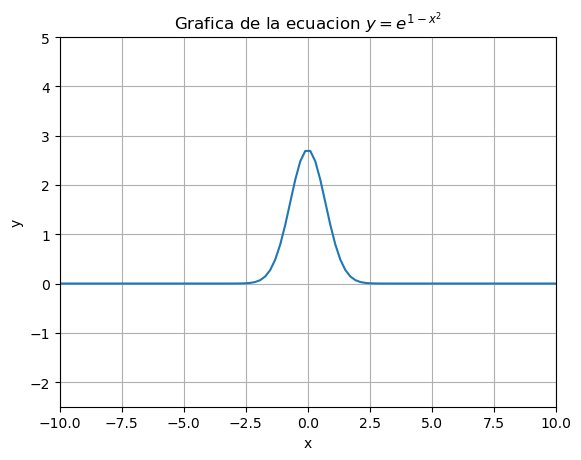

In [271]:
Y = [(lambda x : math.exp(1 - x**2))(x) for x in X]

plt.plot(X, Y)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Grafica de la ecuacion $y = e^{1 - x^2}$')
ax = plt.gca()
ax.set_ylim([-2.5, 5])
ax.set_xlim([-10, 10])
plt.grid(True)
plt.show()


### Literal b)

Use el método de bisección para encontrar una aproximación dentro de $10^{-3}$ para un valor (-2, 0) con $x^2 - e^{1 - x^2} - 1$.

Utilizamos la función bisección:

In [273]:
r, i = bisection(a = -2, b = 0, 
                 equation = lambda x : x**2 - math.exp(1 - x**2) - 1, tol = 10**(-3), N = 20)
print(f'La biseccion dio como resultado la raíz {r} en {i} iteraciones')

La biseccion dio como resultado la raíz -1.2509765625 en 10 iteraciones



## Ejercicio 5

Sea $f(x) = (x + 3)(x + 1)^2x(x - 1)^3(x - 3)$. ¿En qué cero de $f$ converge el método de bisección cuando 
se aplica en los siguientes intervalos? 

Para (-1.5 ; 2.5):


In [275]:
r, i = bisection(a = -1.5, b = 2.5, 
                 equation = lambda x : (x + 3) * (x + 1)**2 * x * (x - 1)**3 * (x - 3), 
                 tol = 10**(-3), N = 20)
print(f'La biseccion dio como resultado la raíz {r} en {i} iteraciones')

AssertionError: The function does not change sign over the interval.


No converge a ningun cero

Para (-0.5 ; 2.4):


In [ ]:
r, i = bisection(a = -0.5, b = 2.4, 
                 equation = lambda x : (x + 3) * (x + 1)**2 * x * (x - 1)**3 * (x - 3), 
                 tol = 10**(-3), N = 20)
print(f'La biseccion dio como resultado la raíz {r} en {i} iteraciones')


No converge a ningun cero

Para (-0.5 ; 3):


In [ ]:
r, i = bisection(a = -0.5, b = 3, 
                 equation = lambda x : (x + 3) * (x + 1)**2 * x * (x - 1)**3 * (x - 3), 
                 tol = 10**(-3), N = 20)
print(f'La biseccion dio como resultado la raíz {r} en {i} iteraciones')


No converge a ningun cero

Para (-3 ; -0.5):


In [ ]:
r, i = bisection(a = -3, b = -0.5, 
                 equation = lambda x : (x + 3) * (x + 1)**2 * x * (x - 1)**3 * (x - 3), 
                 tol = 10**(-3), N = 20)
print(f'La biseccion dio como resultado la raíz {r} en {i} iteraciones')


Este ejercicio analizado en una gráfica, denota que existen raices y son 5, sin embargo, los rangos que pueden tomarse entre estas raices son positivas. Por lo tanto, el método de la bisección no me funcionará.

# Ejercicios aplicados

## Ejercicio 1

Un abrevadero de longitud 𝐿 tiene una sección transversal en forma de semicírculo con radio 𝑟. (Consulte la 
figura adjunta.) Cuando se llena con agua hasta una distancia ℎ a partir de la parte superior, el volumen 𝑉 de 
agua es

$$V = L[0.5 \pi r^2 - r^2 \arcsin{\frac{h}{r}} - h(r^2 - h^2)^{\frac{1}{2}}]$$

Suponga que 𝐿 = 10 𝑐𝑚, 𝑟 = 1 𝑐𝑚 y 𝑉 =12.4 𝑐𝑚. Encuentre la profundidad del agua en el abrevadero 
dentro de 0.01 𝑐𝑚. 

En el ejercicio, 0.01 cm se puede interpretar como el error absoluto que se puede tolerar al calcular $h$. Entonces primero iniciamos reemplazando los valores en la ecuación original, tal que:

$$12.4 = 10[0.5 \pi (1)^2 - 1^2 \arcsin{\frac{h}{1}} - h(1^2 - h^2)^{\frac{1}{2}}]$$

Es complicado solucionar esta ecuación analíticamente, por lo que se utilizará el método de bisección. A la anterior ecuación se tiene que igualar a cero, para así, calcular las raices que h puede tener.

$$0 = 10[0.5 \pi (1)^2 - 1^2 \arcsin{\frac{h}{1}} - h(1^2 - h^2)^{\frac{1}{2}}] - 12.4$$

Finalmente, se implementa en código con una función lambda.


In [ ]:
r, i = bisection(a = 0, b = 1, 
                 equation = lambda x : 10 * (0.5 * math.pi - math.asin(x) - x * (1 - x**2)**0.5) - 12.4, 
                 tol = 0.01, N = 20)
print(f'La profundidad del agua (h) es aproximadamente: {r} cm, calculado en {i} iteraciones')


## Ejercicio 2

Un objeto que cae verticalmente a través del aire está sujeto a una resistencia viscosa, así como a la fuerza 
de gravedad. Suponga que un objeto con masa 𝑚 cae desde una altura 𝑠 y que la altura del objeto después 
de 𝑡 segundos es 

$$s(t) = s_0 - \frac{mg}{k} t + \frac{m^2g}{k^2} (1 - e^{\frac{-kt}{m}})$$

donde 𝑔 = 9.81 $\frac{m}{s^2}$ y 𝑘 representa el coeficiente de la resistencia del aire en $\frac{Ns}{m}$. Suponga $s_0 = 300 m$, $m = 25 kg$ y $k = 0.1 \frac{Ns}{m}$. Encuentre, dentro de 0.01 𝑠𝑒𝑔𝑢𝑛𝑑𝑜𝑠, el tiempo que tarda un cuarto de kg en 
golpear el piso. 

Justo como en el anterior ejercicio, se necesita de métodos numéricos para resolver el problema. Entonces 0.01 segundos es el error absoluto admisible para nuestra raíz. Reemplazamos los datos dados en el enunciado para la fórmula, tal que la ecuación esté respecto al tiempo.

$0 = 300 - \frac{(25)(9.81)}{0.1} t + \frac{(25)^2(9.81)}{(0.1)^2} (1 - e^{\frac{-(0.1)t}{25}})$

Una sustitución adicional es $s(t) = 0$ debido a que esta función representa la altura en la que el objeto se encuentra en cierto momento, pero el problema nos pide el tiempo para cuando colisione con el suelo. Tomando como el sistema de referencia para el eje y el suelo, entonces la altura es cero.

Utilizamos la función bisección:


In [ ]:
r, i = bisection(a = 7, b = 8, 
                 equation = lambda x : 300 - (25*9.81*x)/0.1 + (625*9.81)*(1 - math.exp(-(0.1)*x/25))/0.1**2, 
                 tol = 0.01, N = 20)
print(f'El tiempo en tocar el suelo (t) es aproximadamente: {r} segundos, calculado en {i} iteraciones')


# Ejercicios teóricos

## Ejercicio 1

Use el teorema 2.1 para encontrar una cota para el número de iteraciones necesarias para lograr una 
aproximación con precisión de $10^{-4}$ para la solución de $x^3 - x - 1 = 0$ que se encuentra dentro del intervalo 
(1, 2). Encuentre una aproximación para la raíz con este grado de precisión. 

Como no existe un teorema en el documento del deber, entonces utilizaremos el método de bisección con los parámetros de siempre.


In [ ]:
r, i = bisection(a = 1, b = 2, 
                 equation = lambda x : x**3 - x - 1, 
                 tol = 10**(-4), N = 20)
print(f'La biseccion dio como resultado la raíz {r} en {i} iteraciones')


## Ejercicio 2

La función definida por $f(x) = \sin{\pi x}$ tiene ceros en cada entero. Muestre cuando −1 < 𝑎 < 0 y 2 < 𝑏 < 3, el método de bisección converge a

a. 0,𝑠𝑖 𝑎 + 𝑏 < 2  
b. 2,𝑠𝑖 𝑎 + 𝑏 > 2  
c. 1, 𝑠𝑖 𝑎 +𝑏 = 2

### Literal a) 

Para que se cumpla 𝑎 + 𝑏 < 2, tomamos como valores: a = -0.99 y b = 2.1 Comprobamos cual es la raíz a la que converge en este caso:


In [ ]:
r, i = bisection(a = -0.99, b = 2.1, 
                 equation = lambda x : math.sin(math.pi * x), 
                 tol = 10**(-3), N = 20)
print(f'La biseccion dio como resultado la raíz {r} en {i} iteraciones')


### Literal b)

Para que se cumpla 𝑎 + 𝑏 > 2, tomamos como valores: a = -0.1 y b = 2.9 Comprobamos cual es la raíz a la que converge en este caso:


In [ ]:
r, i = bisection(a = -0.1, b = 2.9, 
                 equation = lambda x : math.sin(math.pi * x), 
                 tol = 10**(-3), N = 20)
print(f'La biseccion dio como resultado la raíz {r} en {i} iteraciones')


### Literal c)

Para que se cumpla 𝑎 + 𝑏 = 2, tomamos como valores: a = -0.5 y b = 2.5 Comprobamos cual es la raíz a la que converge en este caso:


In [ ]:
r, i = bisection(a = -0.5, b = 2.5, 
                 equation = lambda x : math.sin(math.pi * x), 
                 tol = 10**(-3), N = 20)
print(f'La biseccion dio como resultado la raíz {r} en {i} iteraciones')